# 导入函数库

In [1]:
# Import packages
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

# 加载数据

In [2]:
(raw_test, raw_train), metadata = tfds.load(
    'rock_paper_scissors',
    split=['test', 'train'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

## 展示数据信息

In [3]:
raw_train

<_OptionsDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>

In [4]:
raw_test

<_OptionsDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>

In [5]:
metadata

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## 可视化五张图片

In [6]:
get_label_name = metadata.features['label'].int2str

In [7]:
get_label_name

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=tf.int64, num_classes=3)>

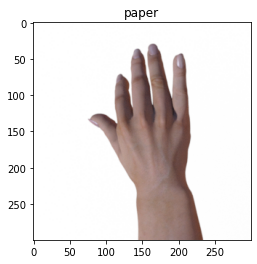

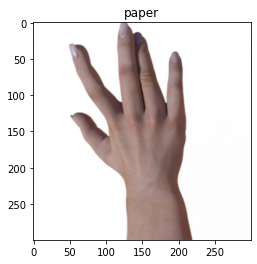

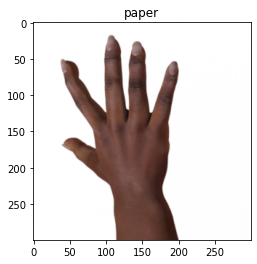

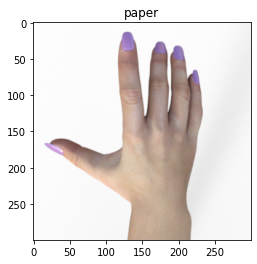

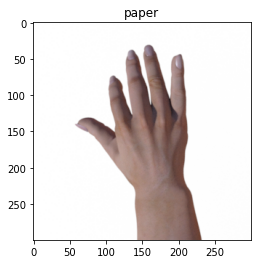

In [8]:
for image, label in raw_train.take(5):  # 这里的raw_train是_OptionsDataset，raw_train_numpy是genetator
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

## 查看数据的数值范围

In [9]:
image

<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 25

## 对数据进行预处理

In [10]:
IMG_SIZE = 300

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [11]:
train = raw_train.map(format_example)
test = raw_test.map(format_example)

In [12]:
train

<MapDataset shapes: ((300, 300, 3), ()), types: (tf.float32, tf.int64)>

In [13]:
test

<MapDataset shapes: ((300, 300, 3), ()), types: (tf.float32, tf.int64)>

## 转化成numpy形式

In [14]:
raw_train

<_OptionsDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>

In [15]:
raw_train_numpy = tfds.as_numpy(raw_train)

In [16]:
raw_train_numpy

<generator object _eager_dataset_iterator at 0x7fa0f47700f8>

## 验证raw_train_num是否正确

In [17]:
count = 0
for i, data in enumerate(raw_train_numpy):
    count += 1

In [18]:
count  # 我们发现之前对raw_train进行过一次.take(5)操作，然后这里的统计值证明数据集里的num是没变的，这是和raw_train_numpy的区别
# 原始数据集里的train_num=2520

2520

In [19]:
data[0].shape

(300, 300, 3)

In [20]:
data[1]

0

In [21]:
data # 是一个tuple

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [253, 253, 253],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 254, 254],
  